In [133]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# import all classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer

In [134]:
df = pd.read_csv('Debernardi et al 2020 data.csv')
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [135]:
df.shape

(590, 14)

In [136]:
df.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [137]:

cols = df.columns.to_list()
df.diagnosis = df.diagnosis == 3
df.sex = df.sex.map({'M': 1, 'F': 0})
df = df[['creatinine',
         'plasma_CA19_9',
         'age',
         'sex',
         'LYVE1',
         'REG1B',
         'TFF1',
         'diagnosis']].copy()
## Turn multiclass problem into binary classification problem, it gives best results (tested but not shown in the final version) ##
df.head(20)

,creatinine,plasma_CA19_9,age,sex,LYVE1,REG1B,TFF1,diagnosis
0,1.83222,11.7,33,0,0.893219,52.94884,654.282174,False
1,0.97266,NaN,81,0,2.037585,94.46703,209.488250,False
2,0.78039,7.0,51,1,0.145589,102.36600,461.141000,False
3,0.70122,8.0,61,1,0.002805,60.57900,142.950000,False
4,0.21489,9.0,62,1,0.000860,65.54000,41.088000,False
5,0.84825,NaN,53,1,0.003393,62.12600,59.793000,False
6,0.62205,NaN,70,1,0.174381,152.27700,117.516000,False
7,0.89349,11.0,58,0,0.003574,3.73000,40.294000,False
8,0.48633,NaN,59,0,0.001945,7.02100,26.782000,False
9,0.61074,24.0,56,0,0.278778,83.92800,19.185000,False


In [138]:
df.isnull().sum()

creatinine         0
plasma_CA19_9    240
age                0
sex                0
LYVE1              0
REG1B              0
TFF1               0
diagnosis          0
dtype: int64

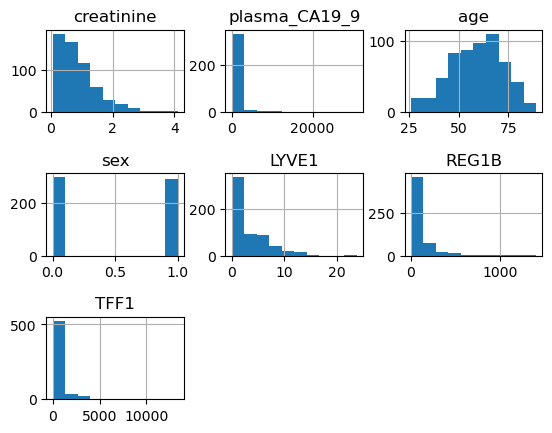

In [139]:
df.hist()
plt.subplots_adjust(hspace=.75)

In [140]:
# diagonis class distribution

df.diagnosis.value_counts()

False    391
True     199
Name: diagnosis, dtype: int64

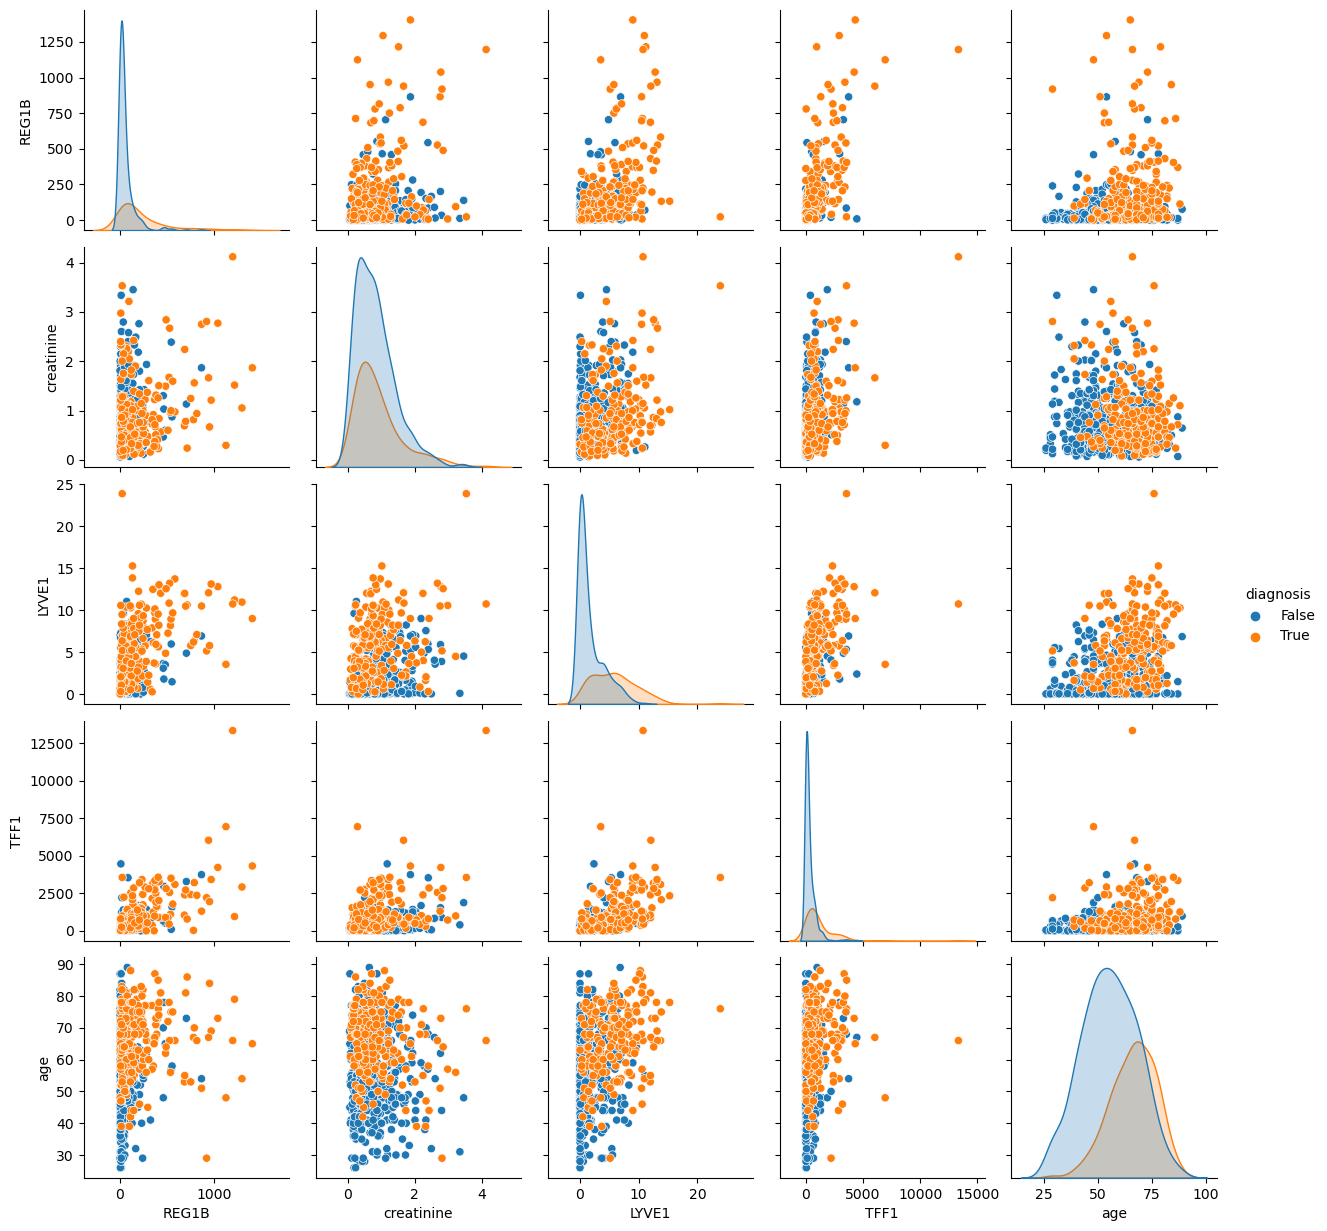

In [141]:
sns.pairplot(data=df, vars=['REG1B',  'creatinine',
             'LYVE1', 'TFF1', 'age'], hue='diagnosis', diag_kind='kde')

<Axes: xlabel='diagnosis', ylabel='TFF1'>

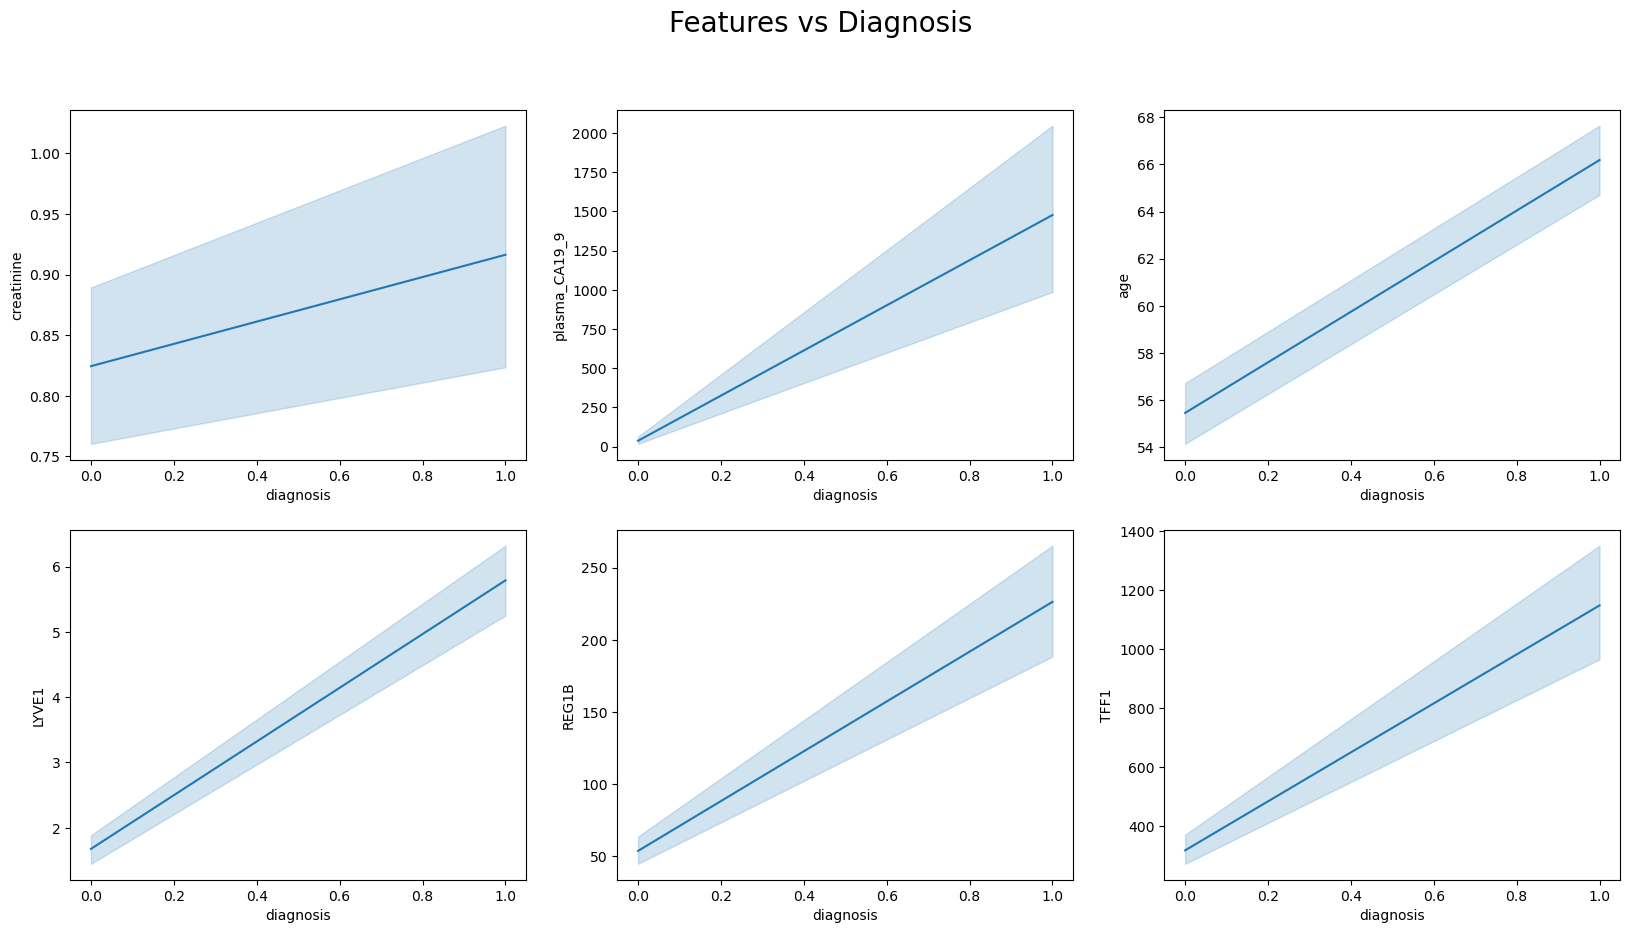

In [142]:
# plot line graph for each feature vs diagnosis

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Features vs Diagnosis', fontsize=20)
sns.lineplot(ax=axes[0, 0], x='diagnosis', y='creatinine', data=df)
sns.lineplot(ax=axes[0, 1], x='diagnosis', y='plasma_CA19_9', data=df)
sns.lineplot(ax=axes[0, 2], x='diagnosis', y='age', data=df)

sns.lineplot(ax=axes[1, 0], x='diagnosis', y='LYVE1', data=df)
sns.lineplot(ax=axes[1, 1], x='diagnosis', y='REG1B', data=df)
sns.lineplot(ax=axes[1, 2], x='diagnosis', y='TFF1', data=df)


<Axes: xlabel='diagnosis', ylabel='count'>

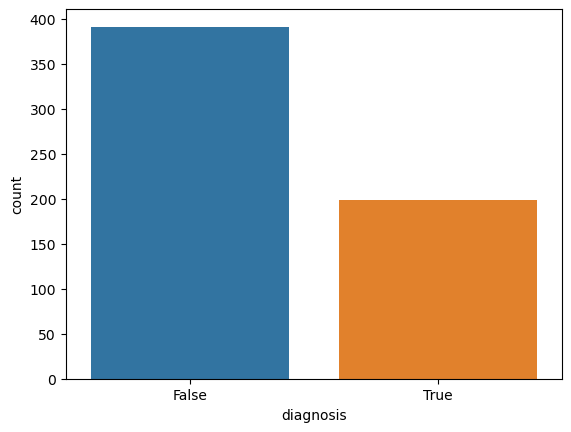

In [143]:
#check imbalance
sns.countplot(x='diagnosis', data=df)

<Axes: >

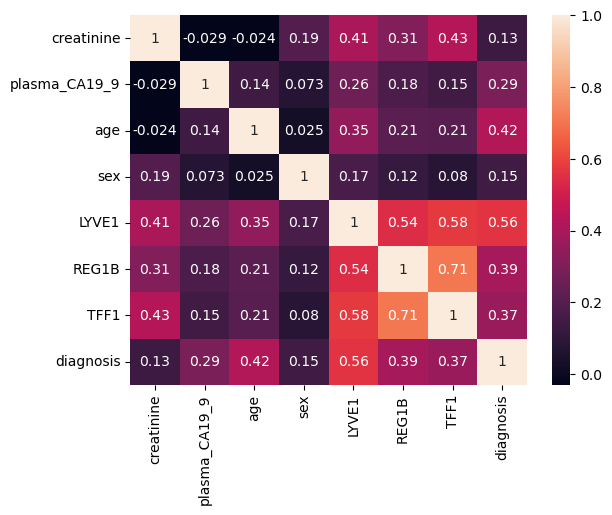

In [144]:
corr = df.dropna().corr()
sns.heatmap(corr, annot=True)

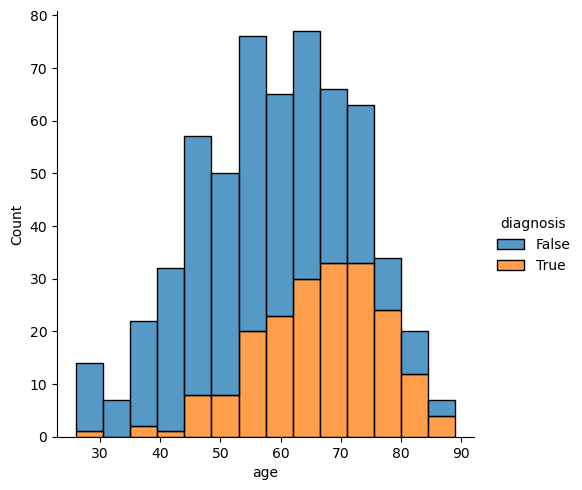

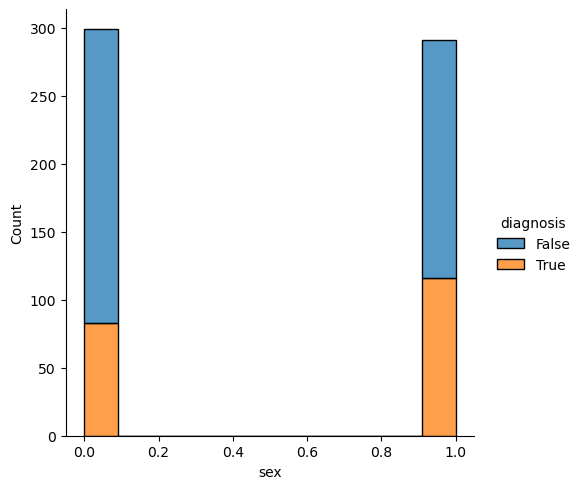

In [145]:
for feature in ['age', 'sex']:
    sns.displot(df, x=feature, hue="diagnosis", multiple='stack')

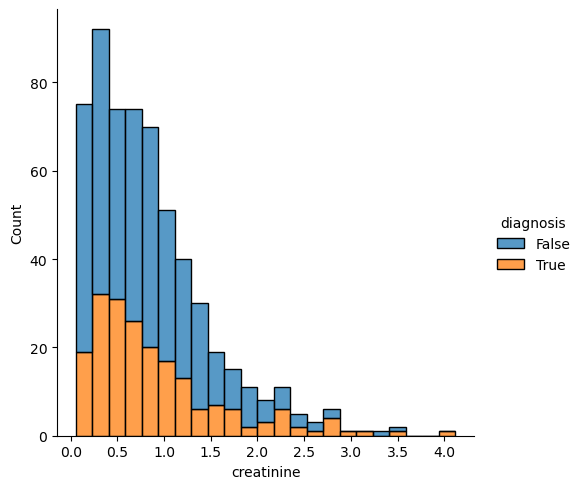

In [146]:
# creatinine vs diagnosis

sns.displot(df, x='creatinine', hue="diagnosis", multiple='stack')

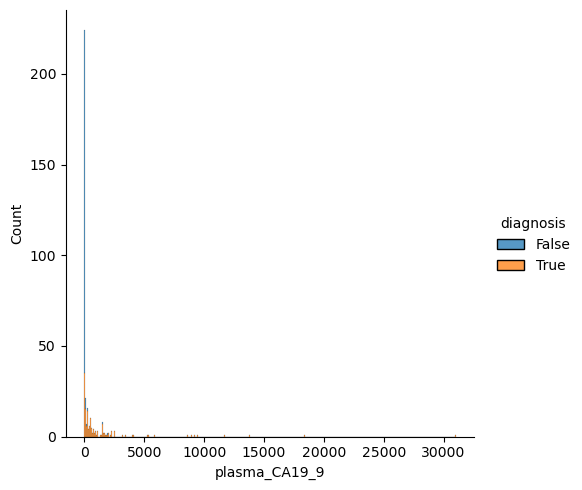

In [147]:
# plasma_CA19_9 vs diagnosis

sns.displot(df, x='plasma_CA19_9', hue="diagnosis", multiple='stack')

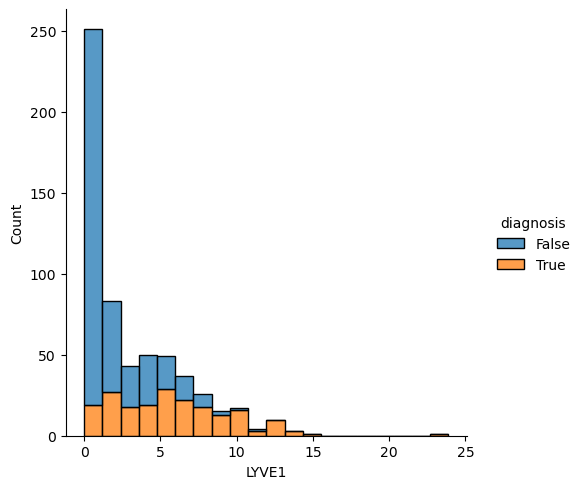

In [148]:
# LYVE1 vs diagnosis

sns.displot(df, x='LYVE1', hue="diagnosis", multiple='stack')

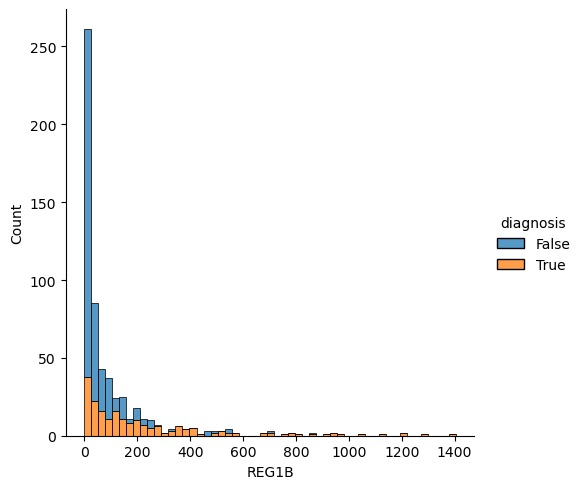

In [149]:
# REG1B vs diagnosis

sns.displot(df, x='REG1B', hue="diagnosis", multiple='stack')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20308\2510908489.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20308\2510908489.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20308\2510908489.py:7: UserWarning:



`distplot` is a 

<Axes: xlabel='TFF1', ylabel='Density'>

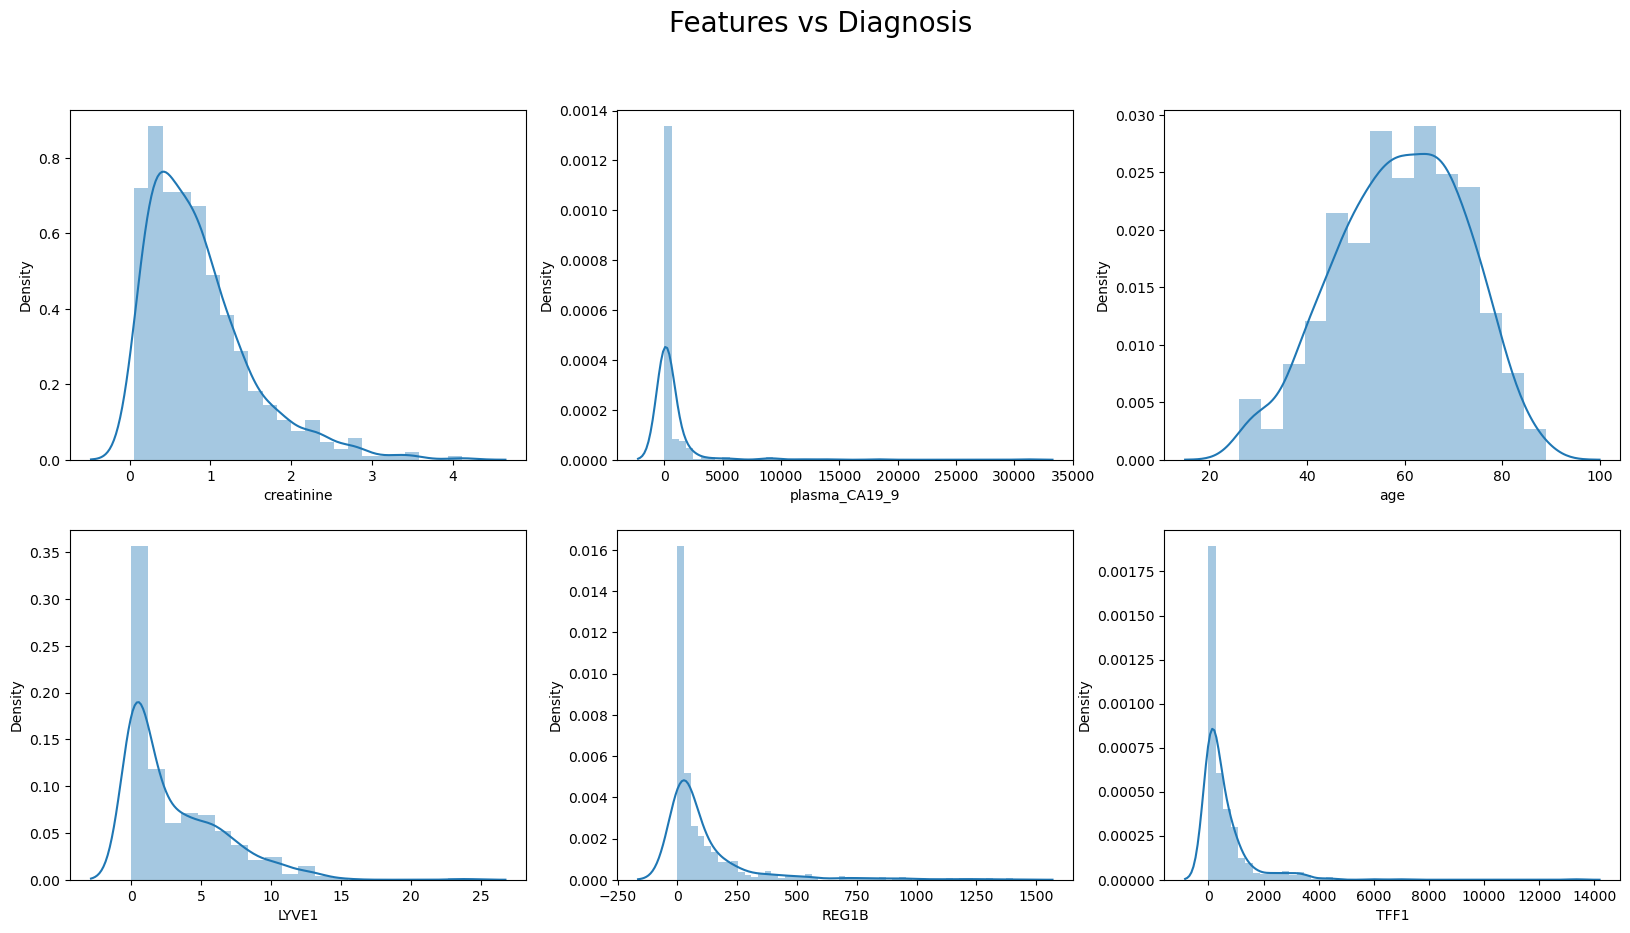

In [150]:
# skewness graph for each feature

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Features vs Diagnosis', fontsize=20)
sns.distplot(df['creatinine'], ax=axes[0, 0])
sns.distplot(df['plasma_CA19_9'], ax=axes[0, 1])
sns.distplot(df['age'], ax=axes[0, 2])

sns.distplot(df['LYVE1'], ax=axes[1, 0])
sns.distplot(df['REG1B'], ax=axes[1, 1])
sns.distplot(df['TFF1'], ax=axes[1, 2])


<Axes: xlabel='diagnosis', ylabel='TFF1'>

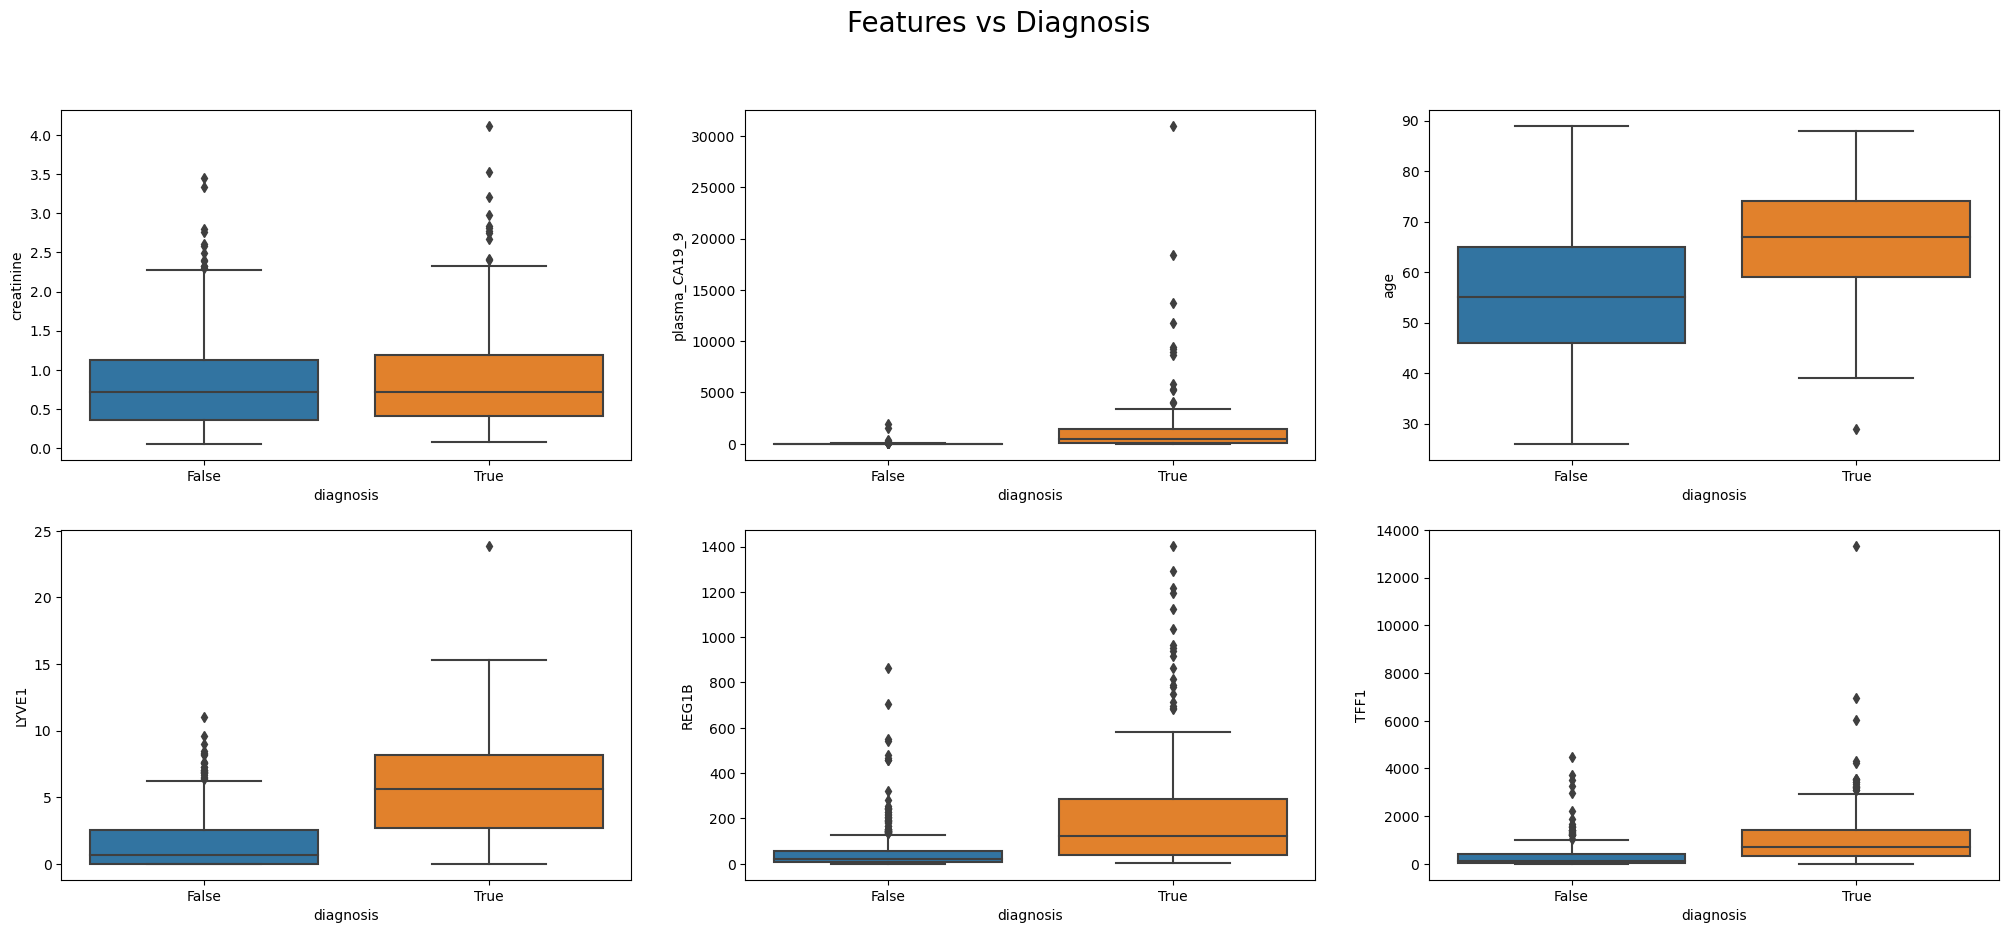

In [151]:

# boxplot for each feature

fig, axes = plt.subplots(2, 3, figsize=(25, 10))
fig.suptitle('Features vs Diagnosis', fontsize=20)
sns.boxplot(ax=axes[0, 0], x='diagnosis', y='creatinine', data=df)
sns.boxplot(ax=axes[0, 1], x='diagnosis', y='plasma_CA19_9', data=df)
sns.boxplot(ax=axes[0, 2], x='diagnosis', y='age', data=df)

sns.boxplot(ax=axes[1, 0], x='diagnosis', y='LYVE1', data=df)
sns.boxplot(ax=axes[1, 1], x='diagnosis', y='REG1B', data=df)
sns.boxplot(ax=axes[1, 2], x='diagnosis', y='TFF1', data=df)


In [152]:
# # impute the missing values with the mean of the column
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(df)
# df = pd.DataFrame(imputer.transform(df), columns=df.columns)

from sklearn.utils import shuffle

In [153]:
df.isnull().sum()

creatinine         0
plasma_CA19_9    240
age                0
sex                0
LYVE1              0
REG1B              0
TFF1               0
diagnosis          0
dtype: int64

In [154]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

In [155]:
# median imputation

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df)
df = pd.DataFrame(imputer.transform(df), columns=df.columns)

In [156]:
positive_cases = df[df['diagnosis'] == True].copy()
df = pd.concat([df, positive_cases], ignore_index=True)

In [157]:
df = shuffle(df, random_state=42).reset_index(drop=True)

In [158]:
models = {
    'Logistic Regression': LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(max_depth=4, random_state=42, max_features=4),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLPClassifier': MLPClassifier(),
    'XGBoost': XGBClassifier(max_depth=5, n_estimators=700, learning_rate=0.1, random_state=42),
    'LGBM': LGBMClassifier(max_depth=5, n_estimators=700)
}

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [159]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=42)

In [160]:
df['plasma_CA19_9']

0      755.000000
1       26.500000
2       26.500000
3       26.500000
4       26.500000
          ...    
784      3.527344
785     26.500000
786     24.000000
787    476.000000
788      6.940000
Name: plasma_CA19_9, Length: 789, dtype: float64

In [161]:
X.columns

Index(['creatinine', 'plasma_CA19_9', 'age', 'sex', 'LYVE1', 'REG1B', 'TFF1'], dtype='object')

In [162]:
#store the results in a dataframe along with the name of the model
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'AUC'])

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_t= model.predict(X_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    results = results.append({'Model': model_name,
                              'Accuracy': accuracy_score(y_test, y_pred),
                              'Precision': precision_score(y_test, y_pred,),
                              'Recall': recall_score(y_test, y_pred),
                              'AUC': roc_auc_score(y_test, y_pred_proba),
                              },
                              ignore_index=True)
results

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20308\1907524369.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20308\1907524369.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20308\1907524369.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\KIIT\AppData\Local\Temp\ipykernel_20308\1907524369.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20308\1907524369.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20308\1907524369.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20308\1907524369.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 327, number of negative: 304
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 631, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.518225 -> initscore=0.072932
[LightGBM] [Info] Start training from score 0.072932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20308\1907524369.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Model,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.822785,0.841270,0.746479,0.928282
1,KNN,0.753165,0.728571,0.718310,0.888133
2,Decision Tree,0.854430,0.842857,0.830986,0.945200
3,Random Forest,0.936709,0.896104,0.971831,0.984458
4,Naive Bayes,0.778481,0.950000,0.535211,0.915169
5,MLPClassifier,0.822785,0.759036,0.887324,0.925045
6,XGBoost,0.943038,0.907895,0.971831,0.978469
7,LGBM,0.949367,0.920000,0.971831,0.981544


In [163]:
results = results.sort_values(by='Accuracy', ascending=False)
results

,Model,Accuracy,Precision,Recall,AUC
7,LGBM,0.949367,0.920000,0.971831,0.981544
6,XGBoost,0.943038,0.907895,0.971831,0.978469
3,Random Forest,0.936709,0.896104,0.971831,0.984458
2,Decision Tree,0.854430,0.842857,0.830986,0.945200
0,Logistic Regression,0.822785,0.841270,0.746479,0.928282
5,MLPClassifier,0.822785,0.759036,0.887324,0.925045
4,Naive Bayes,0.778481,0.950000,0.535211,0.915169
1,KNN,0.753165,0.728571,0.718310,0.888133


In [164]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=list(results.columns),
                fill_color='skyblue',
                align='left'),
    cells=dict(values=[results.Model,
                       results.Accuracy,
                       results.Precision,
                       results.Recall,
                       results.AUC
                     ],
               fill_color='lavender',
               align='left'))
])

fig.show()

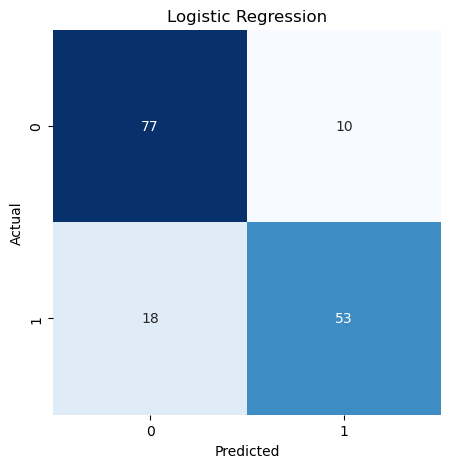

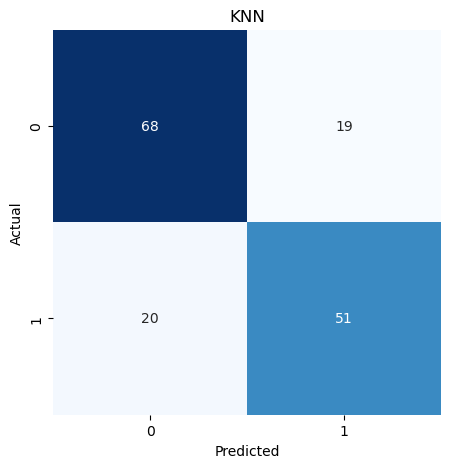

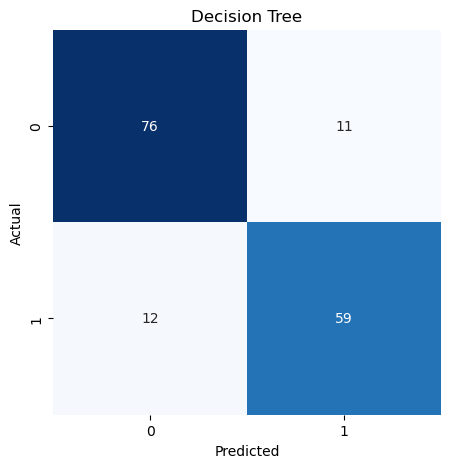

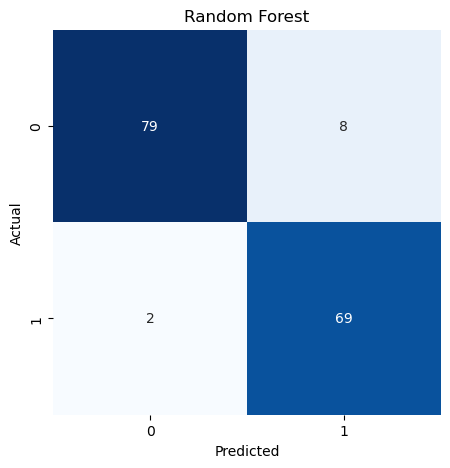

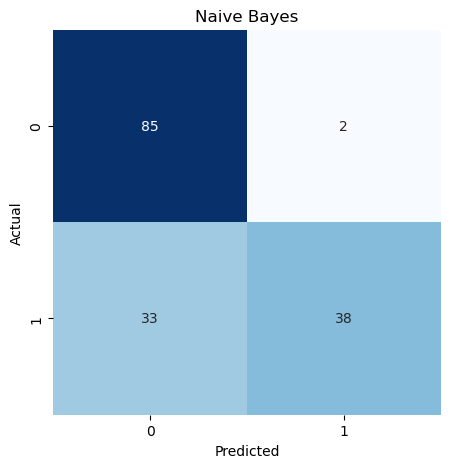

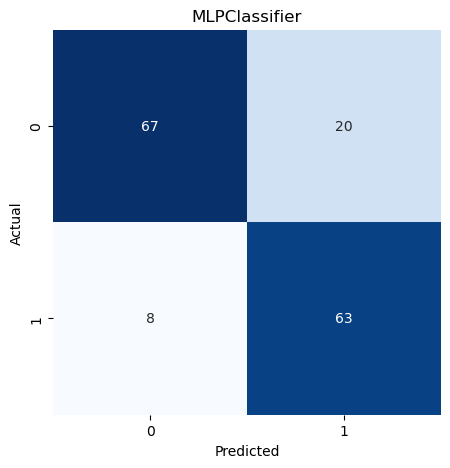

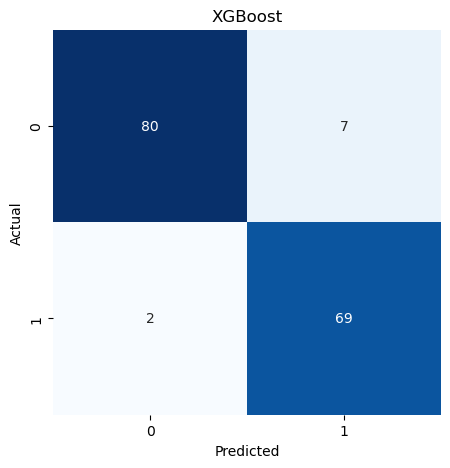

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


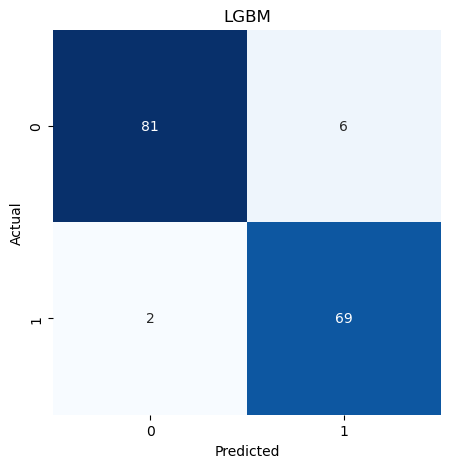

In [165]:

# plot the confusion matrix
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


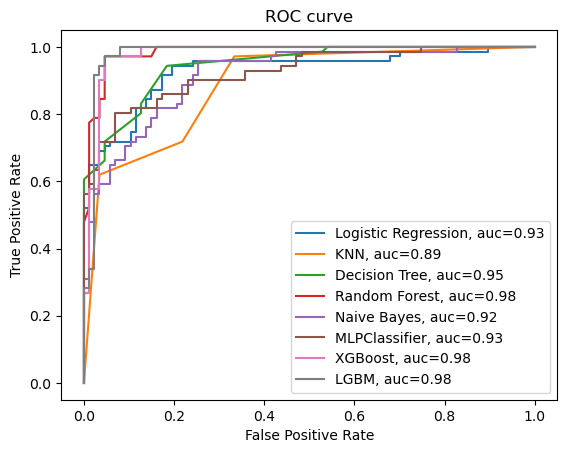

In [166]:

# plot the ROC curve
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[::, 1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    auc=round(auc,2)
    plt.plot(fpr, tpr, label=name + ', auc=' + str(auc))
plt.legend(loc=4)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


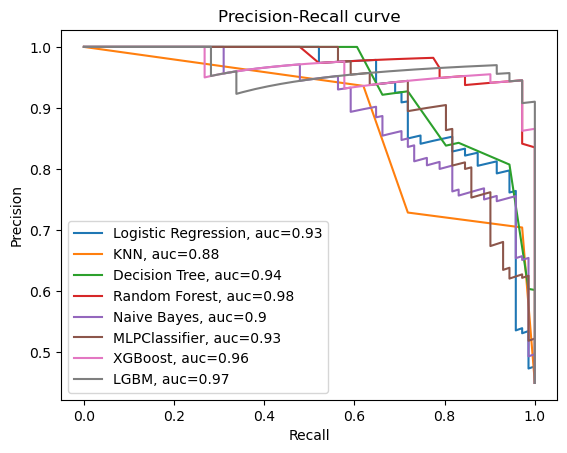

In [167]:
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[::, 1]
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred_proba)
    auc = metrics.auc(recall, precision)
    
    # Round the AUC value to two decimal places
    auc_rounded = round(auc, 2)
    
    plt.plot(recall, precision, label=f"{name}, auc={auc_rounded}")

plt.legend(loc=3)

plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


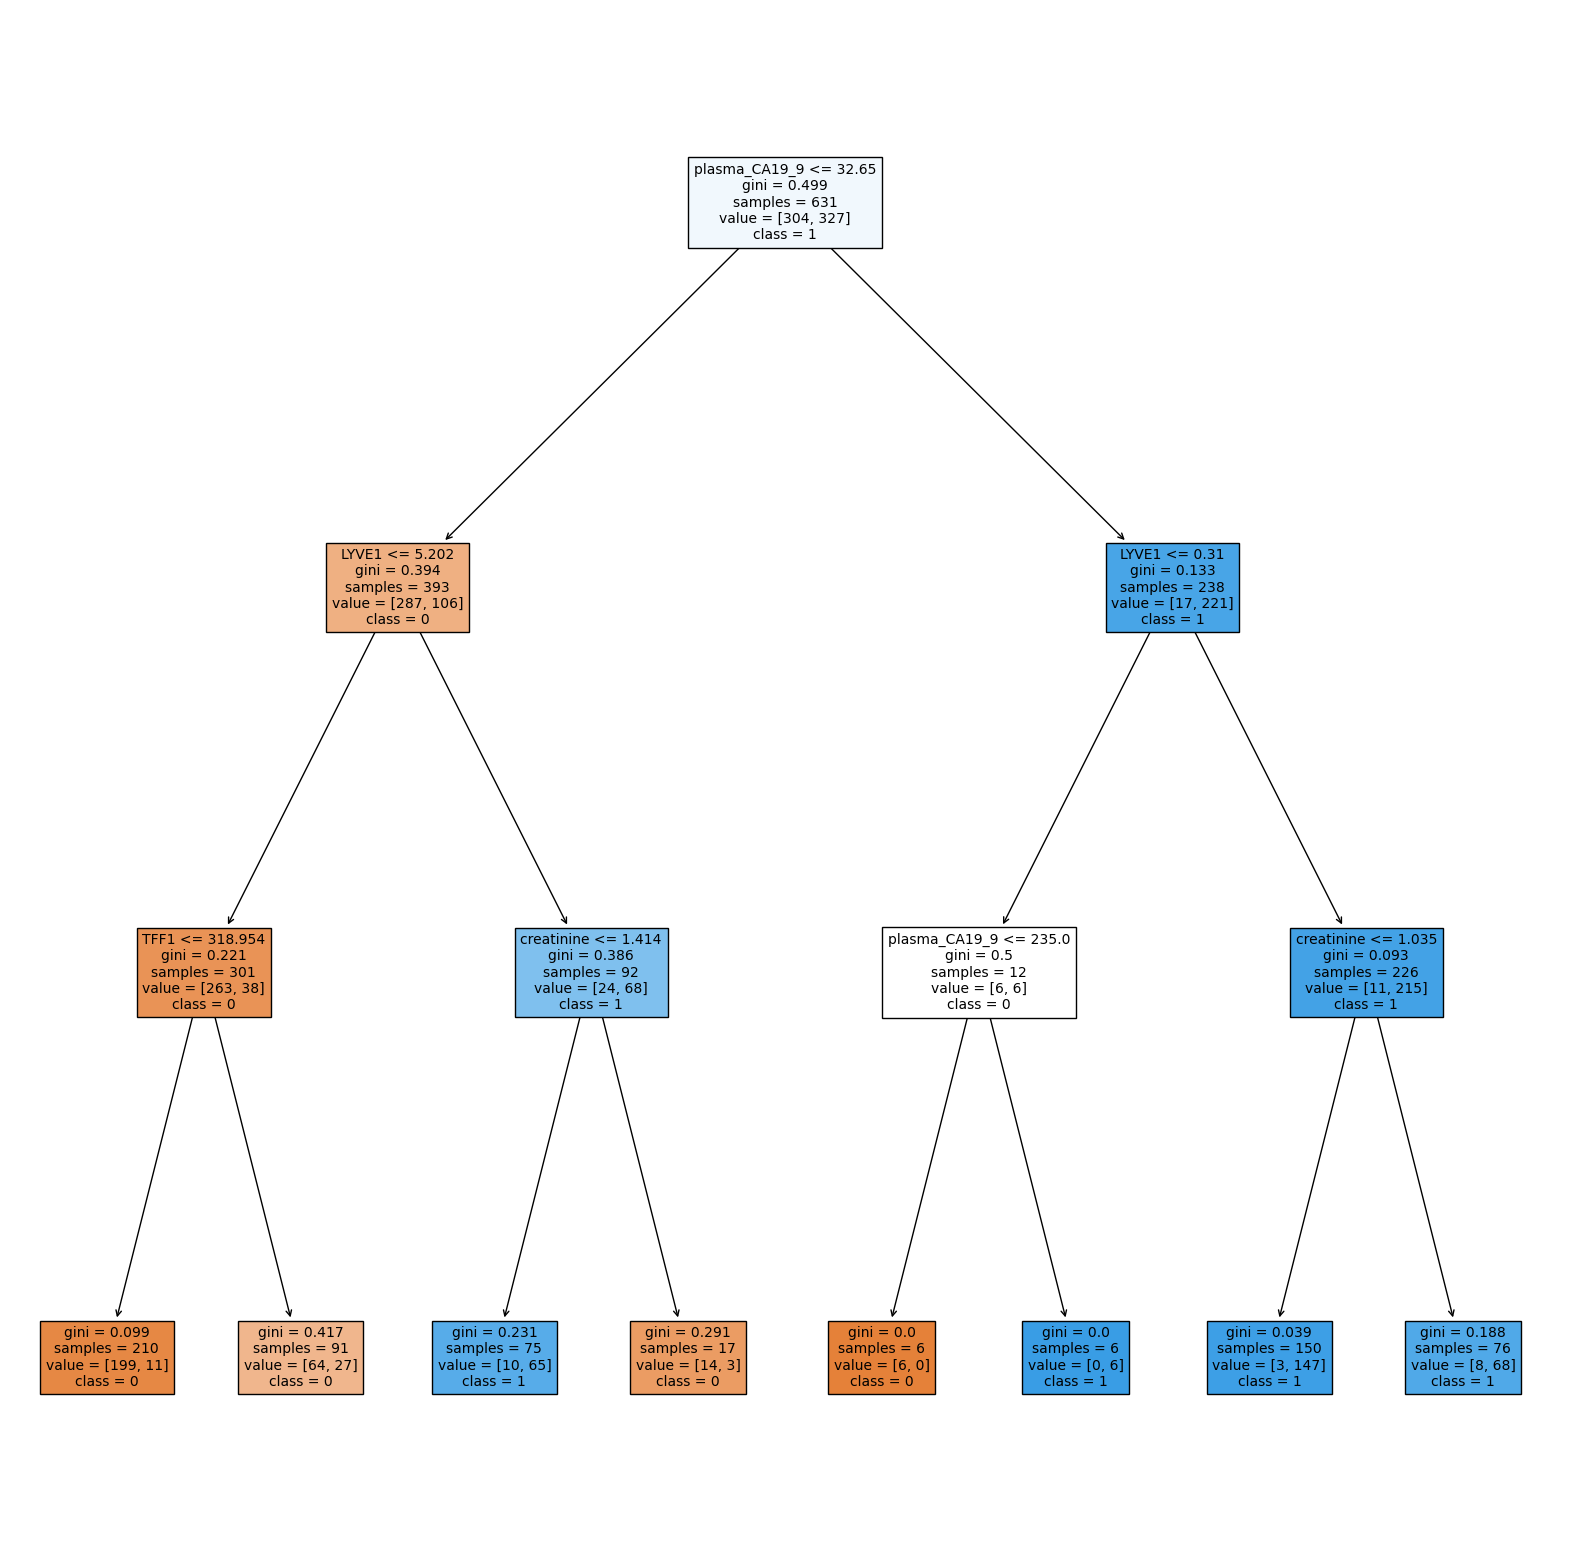

In [168]:

# plot the decision tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
plt.figure(figsize=(20, 20))
plot_tree(model, feature_names=X.columns.tolist(),
          class_names=['0', '1'], filled=True)
plt.show()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 327, number of negative: 304
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 631, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.518225 -> initscore=0.072932
[LightGBM] [Info] Start training from score 0.072932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

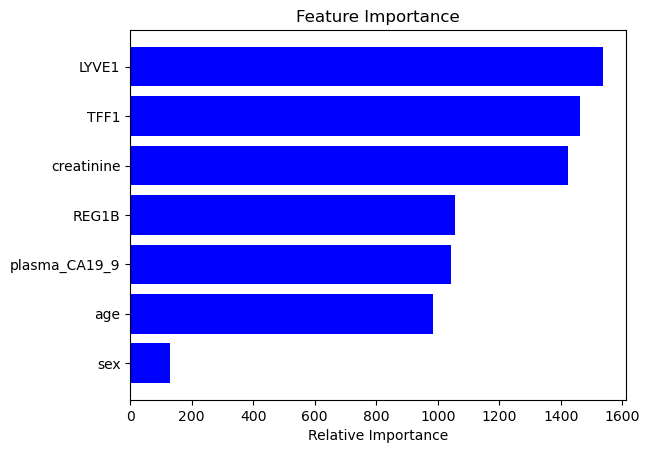

In [169]:

# plot the feature importance
model = LGBMClassifier( max_depth=5, n_estimators=700)
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [170]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

In [171]:
from sklearn.metrics import brier_score_loss

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[::, 1]
    brier_score = brier_score_loss(y_test, y_pred_proba)
    print(name, 'Brier score: ', brier_score)


Logistic Regression Brier score:  0.10116540742889123
KNN Brier score:  0.13924050632911394
Decision Tree Brier score:  0.09651928927995983
Random Forest Brier score:  0.05266329113924051
Naive Bayes Brier score:  0.20359696769641739
MLPClassifier Brier score:  0.12928203870065721
XGBoost Brier score:  0.042959125794271386
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LGBM Brier score:  0.04424737240735355


In [172]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assume X, y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models
rf_model = RandomForestClassifier(random_state=42)
gb_model = LGBMClassifier(random_state=42)

# Meta-model
lr_meta = LogisticRegression()

# Train base models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 327, number of negative: 304
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 631, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.518225 -> initscore=0.072932
[LightGBM] [Info] Start training from score 0.072932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMClassifier(random_state=42)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 327, number of negative: 304
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 631, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.518225 -> initscore=0.072932
[LightGBM] [Info] Start training from score 0.072932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

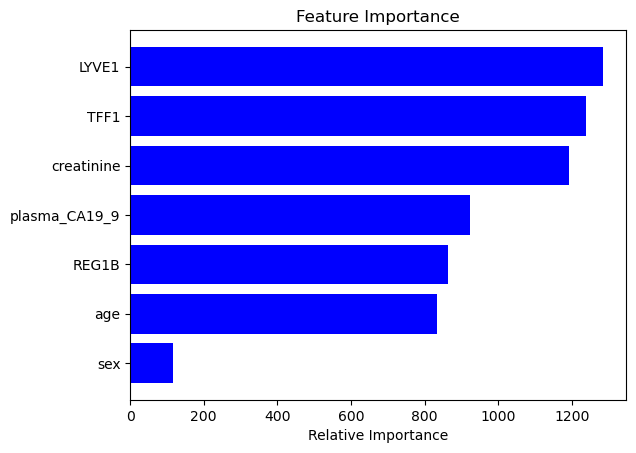

In [173]:

# plot the feature importance
model = LGBMClassifier(max_depth=5, n_estimators=500)
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [174]:

# Generate predictions from base models
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)


In [175]:

# Create a new dataset with predictions from base models
stacked_X_train = pd.DataFrame({'RF': rf_preds, 'GB': gb_preds})


In [176]:

# Train the meta-model on the new dataset
lr_meta.fit(stacked_X_train, y_test)

# Now, let's use the ensemble for predictions
rf_test_preds = rf_model.predict(X_test)
gb_test_preds = gb_model.predict(X_test)

# Create a new dataset with predictions from base models for the test set
stacked_X_test = pd.DataFrame({'RF': rf_test_preds, 'GB': gb_test_preds})

# Use the meta-model to make final predictions
ensemble_preds = lr_meta.predict(stacked_X_test)

# Evaluate the performance
ensemble_accuracy = accuracy_score(y_test, ensemble_preds)
print(f"Ensemble Accuracy: {ensemble_accuracy}")


Ensemble Accuracy: 0.9556962025316456


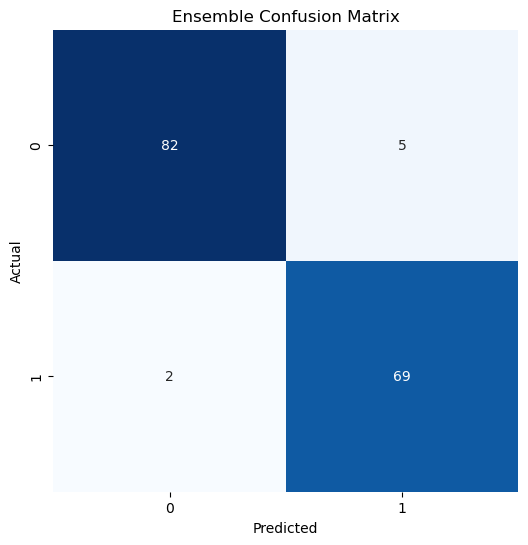

In [177]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix for the ensemble predictions
cm_ensemble = confusion_matrix(y_test, ensemble_preds)

# Plot the confusion matrix for the ensemble model
plt.figure(figsize=(6, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Ensemble Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


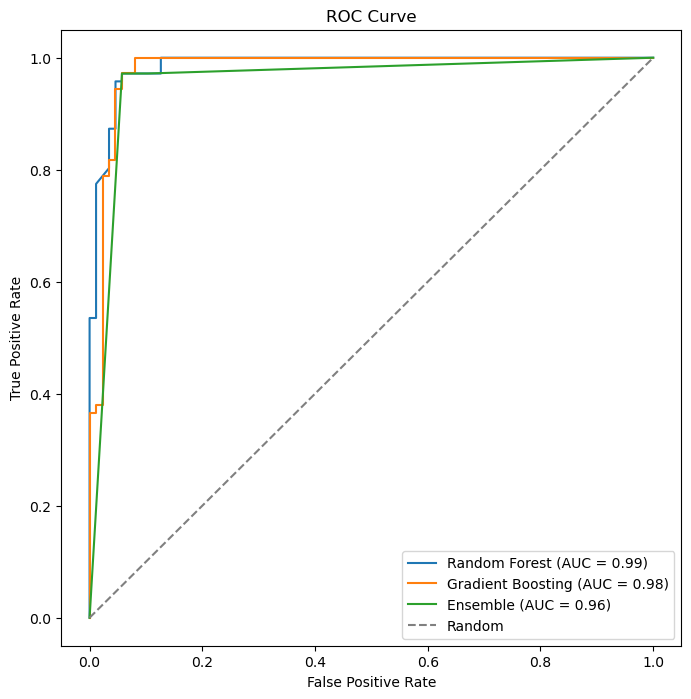

In [178]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for each class
rf_test_probs = rf_model.predict_proba(X_test)[:, 1]
gb_test_probs = gb_model.predict_proba(X_test)[:, 1]
ensemble_probs = lr_meta.predict_proba(stacked_X_test)[:, 1]

# Calculate the ROC curve for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_test_probs)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_test_probs)
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_probs)

# Calculate the AUC for each model
auc_rf = roc_auc_score(y_test, rf_test_probs)
auc_gb = roc_auc_score(y_test, gb_test_probs)
auc_ensemble = roc_auc_score(y_test, ensemble_probs)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.plot(fpr_ensemble, tpr_ensemble, label=f'Ensemble (AUC = {auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [179]:
df.corr()

,creatinine,plasma_CA19_9,age,sex,LYVE1,REG1B,TFF1,diagnosis
creatinine,1.000000,-0.042370,-0.084096,0.157525,0.335224,0.273454,0.405972,0.069499
plasma_CA19_9,-0.042370,1.000000,0.105154,0.052893,0.192855,0.118052,0.126716,0.236999
age,-0.084096,0.105154,1.000000,0.019834,0.361292,0.194538,0.203344,0.416423
sex,0.157525,0.052893,0.019834,1.000000,0.159804,0.153724,0.086658,0.135407
LYVE1,0.335224,0.192855,0.361292,0.159804,1.000000,0.536354,0.564124,0.553148
REG1B,0.273454,0.118052,0.194538,0.153724,0.536354,1.000000,0.689485,0.384470
TFF1,0.405972,0.126716,0.203344,0.086658,0.564124,0.689485,1.000000,0.360363
diagnosis,0.069499,0.236999,0.416423,0.135407,0.553148,0.384470,0.360363,1.000000
